# Pymaceuticals Inc.
---

### Analysis

- Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

Observation 1: If we are to assume that each of the drug trials had a comparable randomized mouse set, Capolmulin and Ramicane had the lowest  mean tumor size.  also, they had the smallest std. dev.  When you combine this with the fact it had no outliers it would appear that Capomulin and/or Ramicane had the best overall results in this specific trial.

Observation 2: Hmm, both Capolmulin and Ramicane were tested on the most mice.  More than 100 additional trials.  So, the data, and especially the mean, median and std dev. may have been effected by this.  You would need to understand why the additional trials were held. Was it because they seemed to have the best results, was the drug cheaper or more available, were the trials being conducted the company who manufactures these drugs?  

Observation 3: Infubinol was the only drug regimen that had an outlier. Also, it appeared that it only had one outlier out of >150 trials. Therefore it should not be seen as statistically relevant.

Observation 4: The correlation coefficient between mouse weight and average tumor volume for Capolmulin is 0.84. Therefore there seems to be a relevant correlation between mouse weight and tumor size.  However, just because they are correlated does not make them relevant because it is possible to assume that larger mice grow larger tumors.  Further study between total body mass and percentage of mass occupied by the tumor would help to understand the correlation and relevance.  

 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
# Combine the data into a single dataset
results_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

results_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [137]:
# Checking the number of mice.
results_complete["Mouse ID"].nunique()

249

In [138]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = results_complete[results_complete.duplicated(["Mouse ID", "Timepoint"])]

duplicate.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [139]:
# Optional: Get all the data for the duplicate mouse ID. 
all989 = results_complete.loc[results_complete["Mouse ID"] =="g989",:]
all989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [140]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#new_results = results_complete.drop_duplicates(subset = 'Mouse ID', keep = False)
#new_results = results_complete.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
#new_results = results_complete.drop([results_complete["Mouse ID"] == "g989"])
new_results = results_complete[results_complete["Mouse ID"] != "g989"]

In [141]:
# Checking the number of mice in the clean DataFrame.
#new_results["Mouse ID", "Timepoint"].nunique()
new_results["Mouse ID"].nunique()

248

## Summary Statistics

In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_mean = new_results.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_median = new_results.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_variance = new_results.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_std = new_results.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_sem = new_results.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

 
# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean, "Median Tumor Volume": drug_median, 
                                    "Tumor Volume Variance": drug_variance, "Tumor Volume Std. Dev.": drug_std, 
                                    "Tumor Volume Std. Err.": drug_sem})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [143]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_aggregate = new_results.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].aggregate(
    ['mean', 'median', 'var', 'std', 'sem'])
drug_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice Used by Drug Regimen')

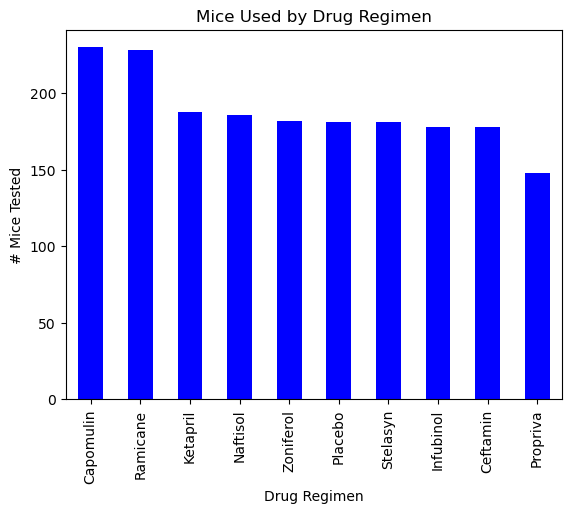

In [144]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_mouse = new_results["Drug Regimen"].value_counts()

bar_time_mouse = time_mouse.plot.bar(color = 'b')

plt.xlabel("Drug Regimen")
plt.ylabel("# Mice Tested")
plt.title("Mice Used by Drug Regimen")


Text(0.5, 1.0, 'Total Number of Time Points')

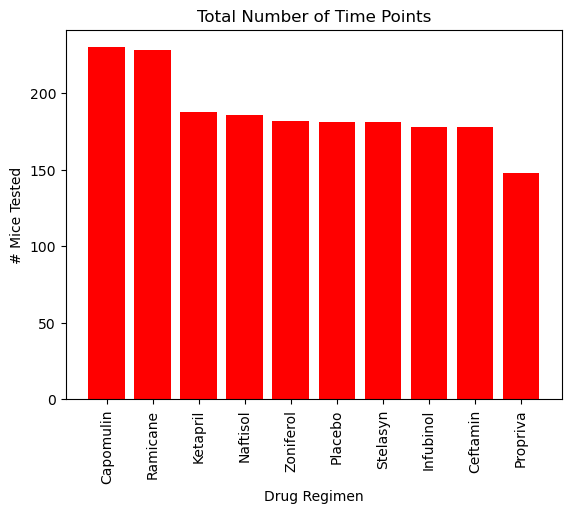

In [145]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#timepoints_mouse = new_results["Timepoint"].value_counts()
x_axis = time_mouse.index.values
y_axis = time_mouse.values

timepoints_bar = plt.bar(x_axis, y_axis, color = 'r')

plt.xlabel("Drug Regimen")
plt.ylabel("# Mice Tested")
plt.xticks(rotation = 'vertical')
plt.title("Total Number of Time Points")



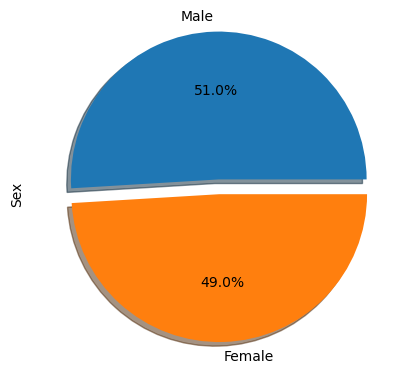

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = new_results["Sex"].value_counts()

explode = (0.1,0)

sex.plot.pie(explode = explode, autopct="%1.1f%%", shadow=True, startangle=0)

plt.show()

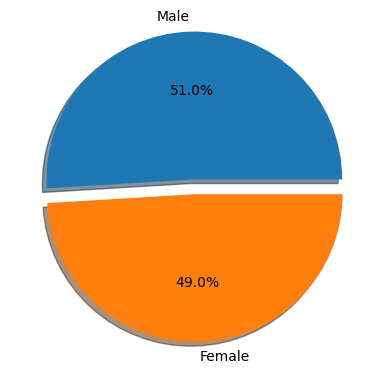

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_male_mouse = new_results.loc[new_results["Sex"] == "Male" ,:].count()
sex_female_mouse = new_results.loc[new_results["Sex"] == "Female" ,:].count()

total_mice = sex_male_mouse["Sex"] + sex_female_mouse["Sex"]

male = ((sex_male_mouse["Sex"]/total_mice) * 100)

female = ((sex_female_mouse["Sex"]/total_mice) * 100)      

explode = (0.1,0)
labels =("Male", "Female")

plt.pie([male, female], labels = labels, explode = explode, shadow=True, startangle=0, autopct='%1.1f%%')

plt.show()


## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Start by getting the last (greatest) timepoint for each mouse
mouse_time_great = results_complete.groupby(['Mouse ID'])['Timepoint'].max()
#mouse_time_great.head()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#results_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
results_tumor_df = pd.merge(mouse_time_great, results_complete, how = "left", on=["Mouse ID", "Timepoint"])
results_tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [149]:
# Put treatments into a list for for loop (and later for plot labels)

treat_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treat_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = results_tumor_df.loc[results_tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {treatment}, the outliers are: {outliers}")
    print(" ")


    

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 


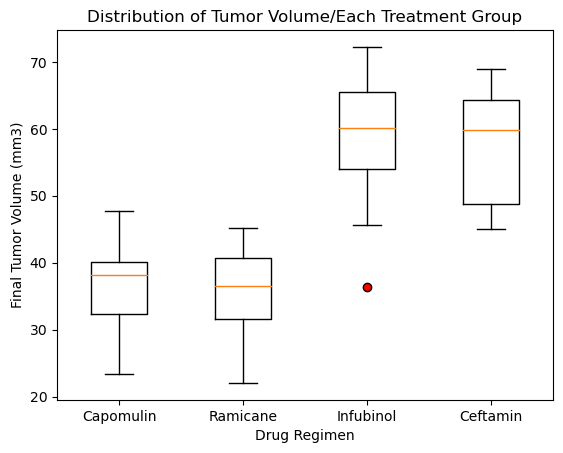

In [150]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Tumor Volume/Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(total_tumor_vol, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.show()



## Line and Scatter Plots

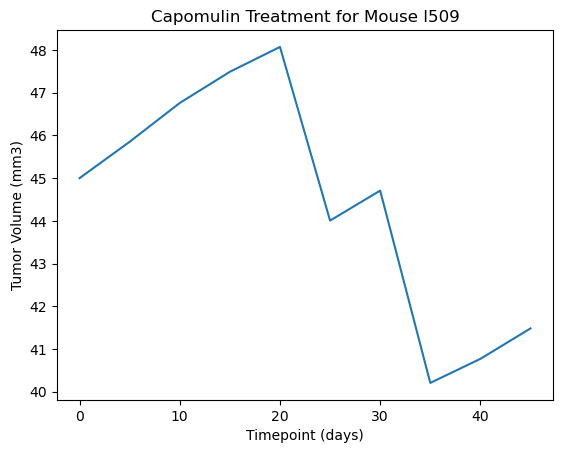

In [151]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = results_complete.loc[results_complete['Drug Regimen'] == "Capomulin",:]
#capo_df
mice_capo = capo_df.loc[capo_df['Mouse ID'] == "l509"]
#mice_capo

# Plot Parameters
x_axis = mice_capo['Timepoint']
data = mice_capo['Tumor Volume (mm3)']

#Label the chart
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse l509")

plt.plot(x_axis, data)
plt.show()


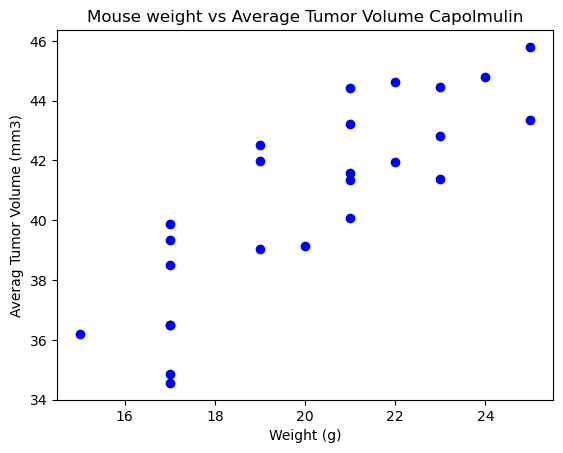

In [152]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capo_df = capo_df.groupby(['Mouse ID']).mean()


plt.scatter(avg_capo_df['Weight (g)'],avg_capo_df['Tumor Volume (mm3)'], color = "blue")
plt.title("Mouse weight vs Average Tumor Volume Capolmulin")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for Capolmulin is 0.84


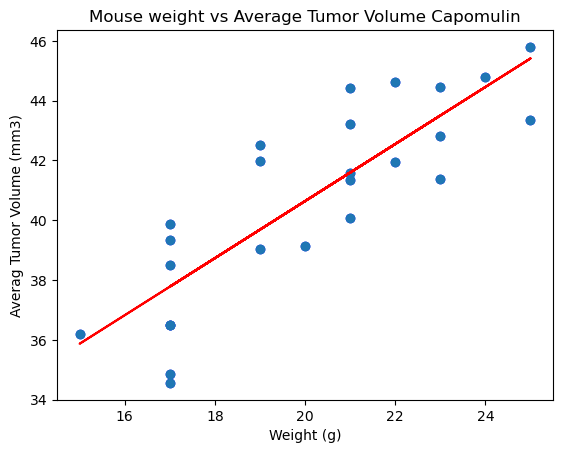

Yes!!! I am finally done!  Not importing linear regression cost me more time than I care to admit


In [153]:

# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume for Capolmulin is {round(st.pearsonr(avg_capo_df['Weight (g)'],avg_capo_df['Tumor Volume (mm3)'])[0],2)}")

# Calculate the linear regression model

#Scatterplot
plt.scatter(avg_capo_df['Weight (g)'],avg_capo_df['Tumor Volume (mm3)'], color = "blue")
plt.title("Mouse weight vs Average Tumor Volume Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

#linear regression

x_values = avg_capo_df['Weight (g)']
y_values = avg_capo_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",)

plt.show()

print("Yes!!! I am finally done!  Not importing linear regression cost me more time than I care to admit")
